<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#通过继承定制一个已有的类" data-toc-modified-id="通过继承定制一个已有的类-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>通过继承定制一个已有的类</a></span><ul class="toc-item"><li><span><a href="#已有类的子类化" data-toc-modified-id="已有类的子类化-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>已有类的子类化</a></span></li><li><span><a href="#再谈init方法" data-toc-modified-id="再谈init方法-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>再谈init方法</a></span></li><li><span><a href="#添加新的contains方法" data-toc-modified-id="添加新的contains方法-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>添加新的contains方法</a></span></li><li><span><a href="#修改已有的add方法" data-toc-modified-id="修改已有的add方法-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>修改已有的add方法</a></span></li><li><span><a href="#ArraySortedBag的运行时间性能" data-toc-modified-id="ArraySortedBag的运行时间性能-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>ArraySortedBag的运行时间性能</a></span></li><li><span><a href="#Python中的类层级" data-toc-modified-id="Python中的类层级-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Python中的类层级</a></span></li></ul></li><li><span><a href="#使用抽象类去除代码冗余性" data-toc-modified-id="使用抽象类去除代码冗余性-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>使用抽象类去除代码冗余性</a></span><ul class="toc-item"><li><span><a href="#设计一个AbstractBag类" data-toc-modified-id="设计一个AbstractBag类-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>设计一个AbstractBag类</a></span></li><li><span><a href="#重新编写init方法" data-toc-modified-id="重新编写init方法-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>重新编写init方法</a></span></li><li><span><a href="#修改AbstractBag的子类" data-toc-modified-id="修改AbstractBag的子类-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>修改AbstractBag的子类</a></span></li><li><span><a href="#将AbstractBag中的add方法泛化" data-toc-modified-id="将AbstractBag中的add方法泛化-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>将AbstractBag中的<strong>add</strong>方法泛化</a></span></li></ul></li><li><span><a href="#所有集合的一个抽象类" data-toc-modified-id="所有集合的一个抽象类-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>所有集合的一个抽象类</a></span><ul class="toc-item"><li><span><a href="#将AbstractCollection整合到集合层中" data-toc-modified-id="将AbstractCollection整合到集合层中-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>将AbstractCollection整合到集合层中</a></span></li><li><span><a href="#在eq方法中使用两个迭代器" data-toc-modified-id="在eq方法中使用两个迭代器-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>在<strong>eq</strong>方法中使用两个迭代器</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

程序员复用已有模型，当一个新类作为一个较为通用的子类而生成的时候，新的类通过继承获得了已有类的所有特性和行为。这就是继承。

复用已有的代码消除了冗余性

# 通过继承定制一个已有的类
但是，子类可能会有一些特殊的行为。如有序包类ArraySortedBag，和常规包一样，但是有三个不同之处：
1. 有序的包允许客户通过for循环，按照排序好的顺序访问其元素
2. 有序的包in运算符以对数时间运行
3. 要添加到包中的项，能够彼此进行比较。这意味着他们识别比较运算符 < <= > 和 >=

## 已有类的子类化
本街利用了继承的特性，使ArraySortedBag类成为ArrayBag类的一个**子类**，ArrayBag类称为ArraySortedBag类的**父类或超类**。他们的关系如下图

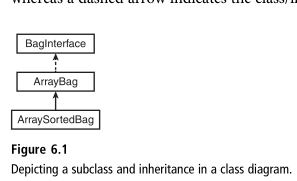

实线表示子类和超类的关系，虚线表示类和接口关系。

创建继承关系，是在父类文件的一个副本上工作，然后进行如下步骤：
1. 删除掉不需要修改的所有方法。只要继承就可以实现它们。但是在新类中，仍然需要__init__方法
2. 在类声明头圆括号放入父类名称
3. 修改那些必须修改的方法的代码（包括__init__）
4. 添加任何新的方法

## 再谈init方法
ArraySortedBag类不包含任何新的实例变量，似乎__init__方法没有什么可做，但是，该方法必须调用父类ArrayBag包中的__init__方法。调用某个类中的任何方法的语法如下
```
<parent class name>.<method name>(self, <other arguments>)
```
要将self传入到ArrayBag的init方法中，self是ArraySortedBag的一个实例



In [ ]:
from arraybag import ArrayBag

class ArraySortedBag(ArrayBag):
    """An array-based sorted bag implementation."""

    # Constructor
    def __init__(self, sourceCollection = None):
        """Sets the initial state of self, which includes the
        contents of sourceCollection, if it's present."""
        ArrayBag.__init__(self, sourceCollection)

## 添加新的contains方法

为了针对有序的包，覆盖掉ArrayBag里面的顺序搜索行为，我们在ArraySortedBag类中加入一个$__contains__$方法，在有序包的数组上实现了一次二叉搜索。这个数组是self._items，并且位于ArrayBag类中，**在ArrayBag类任意子类中都是可以直接访问这个数组名的**

In [ ]:
def __contains__(self, item):
    left = 0
    right = len(self) - 1
    while left <= right:
        midPoint = (left + right) // 2
        if self._items[midPoint] == item:
            return True
        elif self._items[midPoint] > item:
            right = midPoint - 1
        else:
            left = midPoint + 1
    return False

## 修改已有的add方法

有两种情况无需搜索，可以通过将新的项传递给ArrayBag类的add方法来添加它

如果不能饶过搜索工作，比如找到第一个大于或等于新项的项。

In [ ]:
def add(self, item):
    """Adds item to self."""
    # Check array memory here and increase it if necessary
    if len(self) == len(self._items):
        temp = Array(2 * len(self))
        for i in range(len(self)):
            temp[i] = self[i]
        self._items = temp
    # Empty or last item, call ArrayBag.add
    if self.isEmpty() or item >= self._items[len(self) - 1]:
        ArrayBag.add(self, item)
    else:
        # Search for first item >= new item
        targetIndex = 0
        while item > self._items[targetIndex]:
            targetIndex += 1
        # Open a hole for new item
        for i in range(len(self), targetIndex, -1):
            self._items[i] = self._items[i - 1]
        # Insert item and update size
        self._items[targetIndex] = item
        self._size += 1

需要加ArrayBag.add类名来区分add版本。由于ArraySortedBag并没有引入实例变量_items的新版本，这里对self._items都会找到ArrayBag类中的该变量。

## ArraySortedBag的运行时间性能
in运算符最坏的情况运行时间是O(logn)，对于使用新的in运算符的那些方法也有很大改进

## Python中的类层级
每一种数据类型实际上都是一个类，并且所有内建的类都位于一个层级之中。这个层级的最顶端或根部的是object，当你定义一个新类并且从语法上省略了父类的时候，python会自动把这个类放到object类下。

当设计一组集合类的时候，在一个内建的python集合类（如str或list）下进行子类化，这不是一个好主意

# 使用抽象类去除代码冗余性

**如何去除一组已有的类中的冗余的方法和数据，在一个通用的超类之中构造代码，这个超类叫做抽象类**。表明它捕获了相关一组类的通用特征和行为。

## 设计一个AbstractBag类
冗余方法和冗余变量
- 冗余方法：直接调用其他方法并且没有直接访问实例变量的那些方法。如$isEmpty$, $__str__$, $__add__$, $__eq__$ 等方法
- 冗余的实例变量：在每个类中，引用的是不同的数据类型。比如$self.\_items$在不同的类里面引用的是不同的数据类型，$self.\_size$引用的都是整数值所以它是冗余变量。那些访问了$self.\_size$的方法如$__len__$也被称为冗余方法。

AbastractBag类并没有实现包接口，因为AbstractBag中只是包含了宝方法的一个集。其他的三个包类继续遵从包接口。

ArraySortedBag从其父类ArrayBag那里继承了一些方法和数据，并且从其祖先类AbstractBag那里继承了另一些方法和数据。

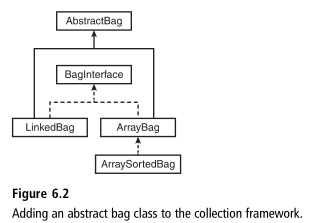

要创建AbstractBag类，首先将它的一个子类的内容复制到一个新文件中，并且将该文件保存为abtractbag.py
1. 删除不相关的import，命名类AbstractBag
2. 删除直接访问实例变量$self.\_items$的所有方法。除了init方法

## 重新编写init方法
AbstractBag中的init方法负责执行两个步骤：
1. 引入变量$self.\_size$并将其初始化为0
2. 将源集合中的项添加到self中（如果需要这个祖先类去做的话）

In [ ]:
class AbstractBag(object):
    """An abstract bag implementation."""

    # Constructor
    def __init__(self, sourceCollection = None):
        """Sets the initial state of self, which includes the
        contents of sourceCollection, if it's present."""
        self._size = 0
        if sourceCollection:
            for item in sourceCollection:
                self.add(item)

## 修改AbstractBag的子类

导入这个父类，然后省略冗余方法，修改init方法

In [ ]:
from arrays import Array
from abstractbag import AbstractBag

class ArrayBag(AbstractBag):
    """An array-based bag implementation."""

    # Class variable
    DEFAULT_CAPACITY = 10

    # Constructor
    def __init__(self, sourceCollection = None):
        """Sets the initial state of self, which includes the
        contents of sourceCollection, if it's present."""
        self._items = Array(ArrayBag.DEFAULT_CAPACITY)
        AbstractBag.__init__(self, sourceCollection)

## 将AbstractBag中的__add__方法泛化
原代码放在AbstractBag中，在测试函数时执行+运算符就会引发错误。因为创建result方法用到ArrayBag类，它不知道是什么。所以用一个type函数

In [ ]:
    def __add__(self, other):
        """Returns a new bag containing the contents
        of self and other."""
        result = type(self)(self)
        for item in other:
            result.add(item)
        return result

# 所有集合的一个抽象类

注意到AbstractBag类的代码，可所有的方法包括init方法，都运行其他的方法或函数，或者直接访问变量$self.\_size$，他们都不会提及包类。
AbstractBag方法可以再任何类型（如列表、栈、队列）上运行的方法，实例变量$self.\_size$也可以用于任何集合的实现中。可以构建一个更加通用的抽象类AbstractCollection

## 将AbstractCollection整合到集合层中

AbstractiCollection类负责引入和初始化$self.\_size$。

包含了所有集合可用的最通用的方法，如isEmpty，$__len__$, $__add__$，不需要由子类修改的

创建步骤，先从AbstractBag中复制代码，修改其命名：
1. 修改init方法
2. 修改$__str__,__eq__$方法提供一个通用的默认实现。加入$isEmpty$, $__str__$, $__add__$, $__len__$等方法

## 在__eq__方法中使用两个迭代器



In [ ]:
def __eq__(self, other):
        """Returns True if self equals other,
        or False otherwise."""
        if self is other: return True
        if type(self) != type(other) or \
           len(self) != len(other):
            return False
        for item in self:
            if not item in other:
                return False
        return True

如果一次只能运行一个for循环

In [ ]:
def __eq__(self, other):
    """return true if self equals other, or false"""
    if self is other: return True
    if type(self) != type(other) or len(self) != len(other):
        return False
    otherIter = iter(other)
    for item in self:
        if item != next(otherIter):# 返回迭代器序列的当前项，并且前进一步到下一个项
            return False
    return True

# Summary
- 子类是父类（超类）一个更加特殊化的版本
- 子类从父类和祖先类中继承了方法和变量
- 子类可以添加自己的方法，将超类的行为特殊化
- 子类可以调用其超类的一个方法，加上父类的前缀
- 抽象类充当其他一组类所有数据和方法的一个库。这些其他的类可以叫具体类。抽象类不能实例化